<a href="https://colab.research.google.com/github/ivynasantino/mineracao-de-dados/blob/master/02-processamento_de_texto/reports/stemmig_tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stemming e Tokenização

Nessa atividade iremos exercitar alguns conceitos sobre processamento de texto usando a coleção coletada nas atividades anteriores.



In [45]:
import pandas as pd
import numpy as np

import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import RSLPStemmer

nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
elpais = pd.read_csv("https://raw.githubusercontent.com/ivynasantino/mineracao-de-dados/master/02-processamento_de_texto/data/results.csv")

In [0]:
toker = RegexpTokenizer(r'\w+')
stopwords = stopwords.words("portuguese") 

'''
Aproveitando a função do notebook anterior
'''
def tokens(type_token):
  result = []
  for n in elpais.text:
    tokens = [token for token in toker.tokenize(n.lower()) 
              if token not in stopwords 
              and len(token) > 3
              and not bool(re.search(r'\d', token))]
  if type_token == 'bigram':
    result.extend(list(nltk.bigrams(tokens)))
  elif type_token == 'statistics collection':
    result.extend(tokens)
  return result

In [48]:
total_docs = elpais.text.count()

wl = tokens('statistics collection')

total_word_occur = len(wl) 
vocabulary_size = len(set(wl)) 

words = pd.DataFrame(wl, columns = ['word'])

word_count = words.word.value_counts().reset_index()

word_count.columns = ['word', 'freq']
word_count['r'] = word_count.freq.rank(ascending = False, 
                                       method = 'first')

occur_th = len(word_count[word_count.freq > 1000])

occur_once = len(word_count[word_count.freq == 1])


sta = ['Total documents', 
       'Total word occurences', 
       'Vocabulary size', 
       'Words occuring > 1000 times', 
       'Words occuring once']

values = [total_docs, 
          total_word_occur, 
          vocabulary_size, 
          occur_th, 
          occur_once]

table = pd.DataFrame(data = {'statistics collection': sta,
                            'values': values})

table

,statistics collection,values
0,Total documents,249
1,Total word occurences,1716
2,Vocabulary size,973
3,Words occuring > 1000 times,0
4,Words occuring once,724


In [49]:
word_count['Pr(%)'] = round((word_count.freq / total_word_occur) * 100, 3)
word_count['r.Pr'] = round(word_count.r * word_count['Pr(%)'] / 100, 2)

word_count[:50]

,word,freq,r,Pr(%),r.Pr
0,marido,31,1.0,1.807,0.02
1,califado,25,2.0,1.457,0.03
2,campo,19,3.0,1.107,0.03
3,filhos,19,4.0,1.107,0.04
4,anos,17,5.0,0.991,0.05
5,síria,16,6.0,0.932,0.06
6,baguz,14,7.0,0.816,0.06
7,mulheres,13,8.0,0.758,0.06
8,jihadistas,13,9.0,0.758,0.07
9,família,12,10.0,0.699,0.07


In [50]:
stemmer = nltk.stem.RSLPStemmer()

stemmers = [stemmer.stem(token) for token in wl]

for ste in stemmers:
   print(ste)


únic
cois
desej
sair
daqu
pod
conden
cuid
cas
filh
est
islâm
diz
yoland
martín
lun
fernánd
lubn
milud
cidadã
espanhol
viaj
marid
sír
sobreviv
desmoron
calif
últ
redut
baguz
oásil
fronteir
orient
sír
iraqu
convers
país
casebr
camp
acolh
ond
pesso
ret
cond
perig
insalubr
send
mulh
men
idad
trê
espanhol
cuid
crianç
marid
espanhol
pres
cade
curd
outr
doi
morr
part
grup
espanhol
ader
calif
nasc
égid
sobreviv
colaps
madrilenh
yoland
martín
ano
lun
fernánd
quatr
filh
cad
fernánd
gráv
quint
cuid
outr
quatr
crianç
ser
filh
casal
marroquin
resid
espanh
mort
infern
baguz
ambas
manifest
desej
volt
espanh
pud
tir
daqu
quer
emb
pod
separ
filh
exclam
fernánd
martín
compartilh
inquiet
terc
grup
lubn
milud
orig
marroquin
cheg
camp
trê
crianç
pris
custodi
trop
curd
forç
ali
coaliz
internac
detent
espanhol
trat
om
harsh
orig
marroquin
marid
martín
cont
rend
atrás
irmã
relig
ref
dua
concidadã
fic
viúv
marid
orig
marroquin
nacion
espanhol
falec
dur
conflit
relat
engan
marid
sobr
mudanç
apresent
cinc
ano
at

In [51]:
total_stem_occur = len(stemmers)
 
words = pd.DataFrame(stemmers, columns = ['word'])

stem_count = words.word.value_counts().reset_index()

stem_count.columns = ['word', 'freq']
stem_count['r'] = stem_count.freq.rank(ascending = False, 
                                       method = 'first')

stem_count['Pr(%)'] = round((stem_count.freq / total_stem_occur) * 100, 3)
stem_count['r.Pr'] = round(stem_count.r * stem_count['Pr(%)'] / 100, 2)

stem_count[:50]

,word,freq,r,Pr(%),r.Pr
0,marid,37,1.0,2.156,0.02
1,calif,26,2.0,1.515,0.03
2,espanhol,23,3.0,1.340,0.04
3,camp,23,4.0,1.340,0.05
4,filh,21,5.0,1.224,0.06
5,jihad,19,6.0,1.107,0.07
6,mulh,18,7.0,1.049,0.07
7,cas,18,8.0,1.049,0.08
8,sír,18,9.0,1.049,0.09
9,ano,17,10.0,0.991,0.10


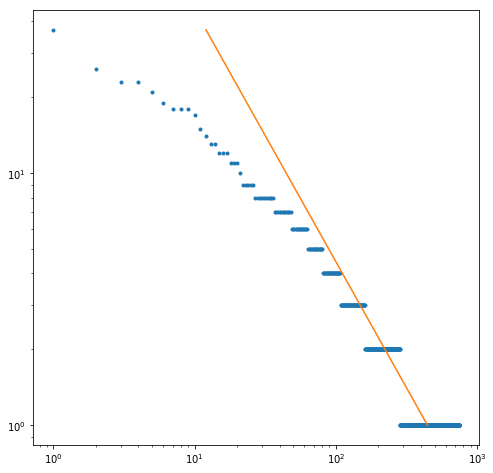

In [60]:
%matplotlib inline

pr_stem = stem_count.freq / total_stem_occur * 100
rpr_stem = stem_count.r * (stem_count['Pr(%)']) / 100

stem_count['pred'] = np.median(rpr_stem) / pr_stem * 100

f, ax = plt.subplots(figsize = (8, 8))
ax.set(xscale = 'log', 
       yscale = 'log')

plt.plot(stem_count['r'], stem_count['freq'], linestyle="", marker='.')
plt.plot(stem_count['pred'], stem_count['freq'])
plt.show()